In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

from medangel.data import preprocessing
from medangel.models import model_builder
from medangel.features import feature_creation

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import matthews_corrcoef

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.transformers import FeatureSelector

from lightgbm import LGBMClassifier

import re

import time

In [31]:
diff_data = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\diff_comparison_diff_data_v3.h5',key="df")

In [32]:
no_diff_data = pd.read_hdf(r'C:\Users\AliHa\Desktop\Masters Project\medangel\data\preprocessed\diff_comparison_data_v2.h5',key="df")

In [33]:
diff_data

title  test_device    scores   fit_times  pred_times
0    with_diff        31948  0.926705  213.060594    3.919997
1    with_diff        48790  0.844592  157.850141    6.452460
2    with_diff        49444  0.714517  127.364567    2.158486
3    with_diff        49446  0.651581  122.140389    4.190949
4    with_diff        49465  0.568403  124.677438    1.166264
..         ...          ...       ...         ...         ...
320  with_diff        52049  0.681478  132.731089    3.250582
321  with_diff        52148  0.749477  132.448431    3.260760
322  with_diff        59396  0.868331  141.233421    0.234863
323  with_diff        59497  0.639341  119.424440    0.468106
324  with_diff        59519  0.736199  126.779596    0.158036

[325 rows x 5 columns]

In [34]:
no_diff_data

title  test_device    scores  fit_times  pred_times
0    no_diff        31948  0.875710  40.372121    1.641659
1    no_diff        48790  0.845807  38.714993    2.670604
2    no_diff        49444  0.686204  39.698981    0.945212
3    no_diff        49446  0.646802  39.017131    1.881426
4    no_diff        49465  0.589940  40.261795    0.538122
..       ...          ...       ...        ...         ...
320  no_diff        52049  0.680940  41.119180    1.443327
321  no_diff        52148  0.755231  42.166984    1.435326
322  no_diff        59396  0.822729  40.792098    0.108025
323  no_diff        59497  0.739498  37.285525    0.195045
324  no_diff        59519  0.746753  42.116718    0.075017

[325 rows x 5 columns]

In [35]:
df = diff_data.append(no_diff_data)

In [36]:
df

title  test_device    scores   fit_times  pred_times
0    with_diff        31948  0.926705  213.060594    3.919997
1    with_diff        48790  0.844592  157.850141    6.452460
2    with_diff        49444  0.714517  127.364567    2.158486
3    with_diff        49446  0.651581  122.140389    4.190949
4    with_diff        49465  0.568403  124.677438    1.166264
..         ...          ...       ...         ...         ...
320    no_diff        52049  0.680940   41.119180    1.443327
321    no_diff        52148  0.755231   42.166984    1.435326
322    no_diff        59396  0.822729   40.792098    0.108025
323    no_diff        59497  0.739498   37.285525    0.195045
324    no_diff        59519  0.746753   42.116718    0.075017

[650 rows x 5 columns]

[Text(0, 0, 'with_diff'), Text(0, 0, 'no_diff')]

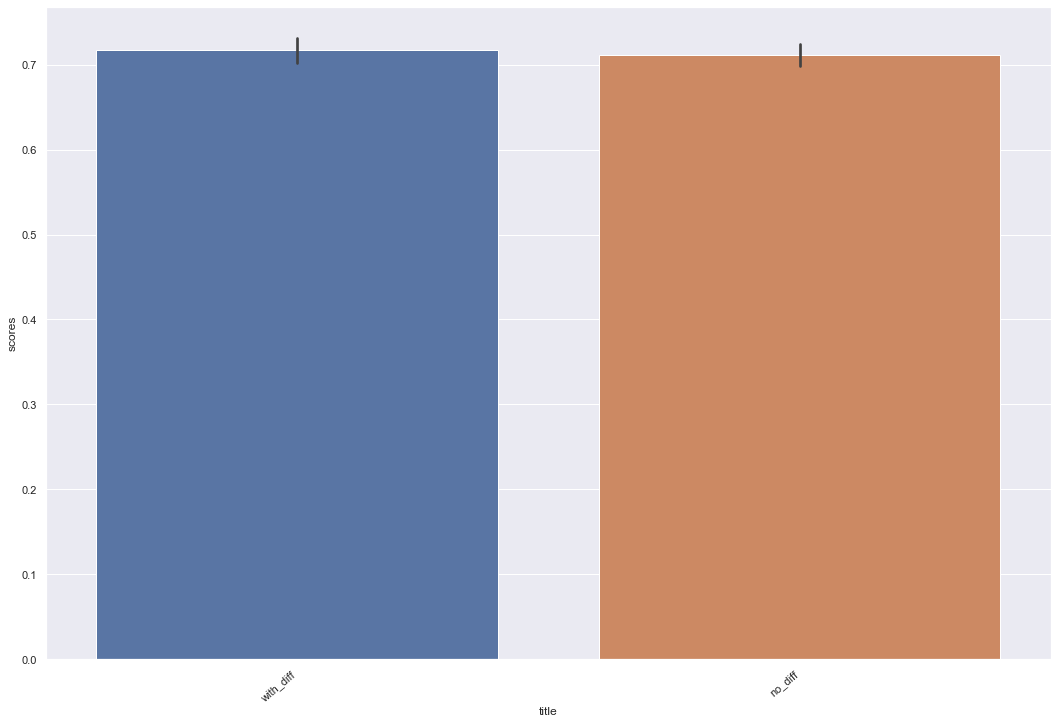

In [37]:
ax = sns.barplot(x="title", y="scores", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

[Text(0, 0, 'with_diff'), Text(0, 0, 'no_diff')]

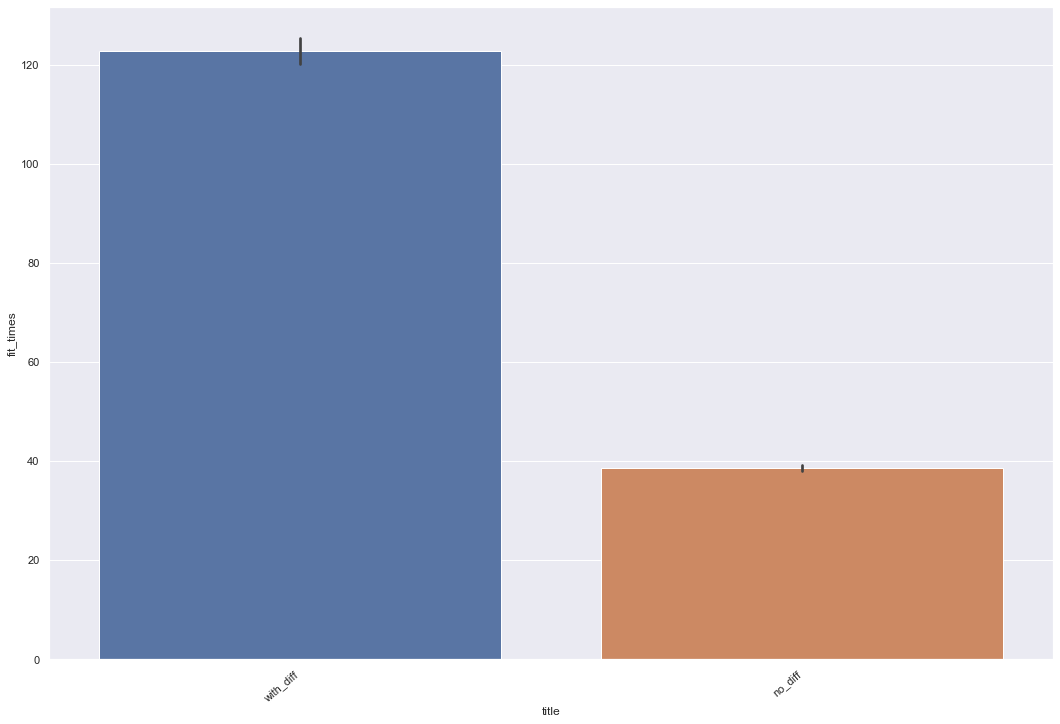

In [38]:
ax = sns.barplot(x="title", y="fit_times", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [39]:
#df_temperature = preprocessing.load_relevant_data()

In [40]:
df[df.title == 'no_diff'].scores.describe()

count    325.000000
mean       0.710959
std        0.117993
min        0.416728
25%        0.649321
50%        0.732451
75%        0.815076
max        0.889876
Name: scores, dtype: float64

In [41]:
df[df.title == 'with_diff'].scores.describe()

count    325.000000
mean       0.717033
std        0.127005
min        0.443150
25%        0.646433
50%        0.714517
75%        0.839425
max        0.926833
Name: scores, dtype: float64

[Text(0, 0, '31948'),
 Text(0, 0, '48790'),
 Text(0, 0, '49444'),
 Text(0, 0, '49446'),
 Text(0, 0, '49465'),
 Text(0, 0, '49486'),
 Text(0, 0, '49589'),
 Text(0, 0, '52040'),
 Text(0, 0, '52049'),
 Text(0, 0, '52148'),
 Text(0, 0, '59396'),
 Text(0, 0, '59497'),
 Text(0, 0, '59519')]

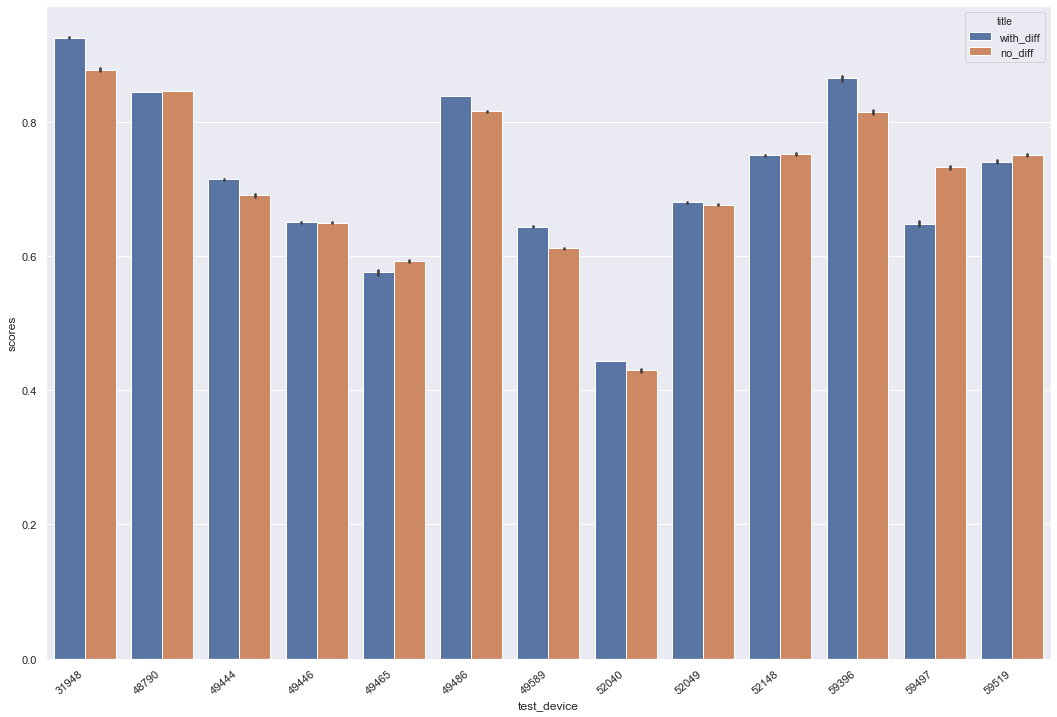

In [42]:
sns.set(rc={'figure.figsize':(18,12)})
ax = sns.barplot(x="test_device", y="scores", data=df, hue='title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

[Text(0, 0, '31948'),
 Text(0, 0, '48790'),
 Text(0, 0, '49444'),
 Text(0, 0, '49446'),
 Text(0, 0, '49465'),
 Text(0, 0, '49486'),
 Text(0, 0, '49589'),
 Text(0, 0, '52040'),
 Text(0, 0, '52049'),
 Text(0, 0, '52148'),
 Text(0, 0, '59396'),
 Text(0, 0, '59497'),
 Text(0, 0, '59519')]

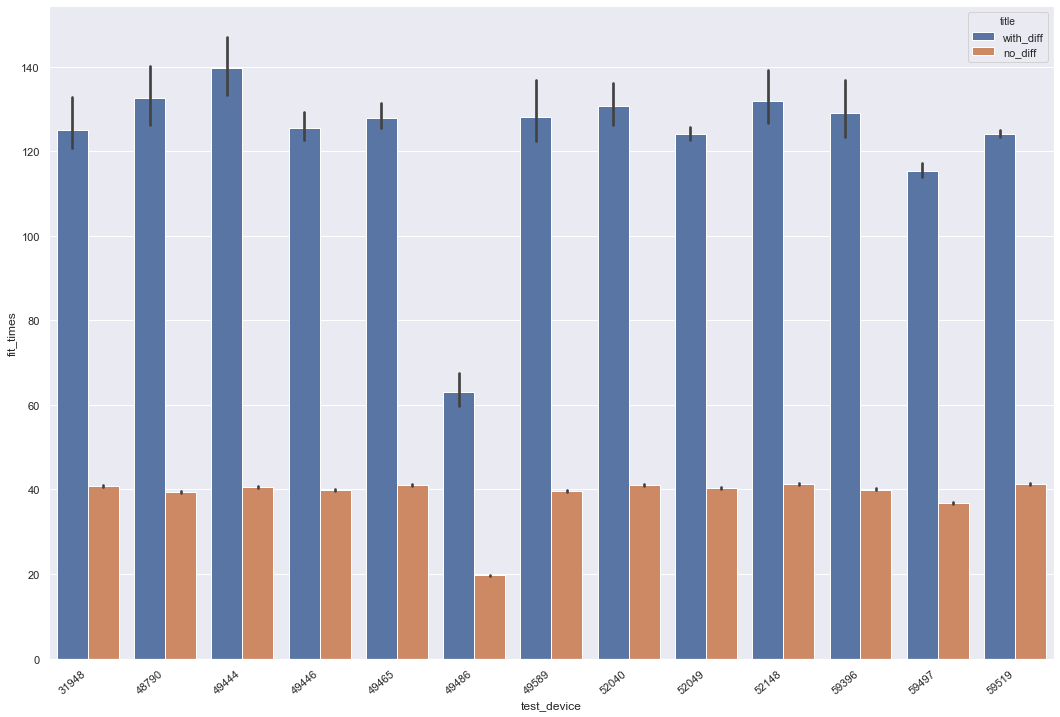

In [43]:
sns.set(rc={'figure.figsize':(18,12)})
ax = sns.barplot(x="test_device", y="fit_times", data=df, hue='title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [44]:
#df_temperature[df_temperature.device_id == 52040].plot(x="datetime",y="temperature")

In [45]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

print(f"Running on PyMC3 v{pm.__version__}")

Running on PyMC3 v3.11.2


In [46]:
devices = preprocessing.load_device_ids()

In [47]:
# for device in devices:
#     if device in [49103,47683]:
#         pass
#     else:
#         df_temp = df[df.test_device == device]
#         #df[df.test_device == device].hist("scores", by="title", figsize=(8, 4));
#         μ_m = df_temp.scores.mean()
#         μ_s = df_temp.scores.std() * 2

#         with pm.Model() as model:
#             group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
#             group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)
#         with model:
#             ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

#         pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={"alpha": 0.5});
#         σ_low = 1
#         σ_high = 10

#         with model:
#             group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
#             group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)
#         with model:
#             lam1 = group1_std ** -2
#             lam2 = group2_std ** -2
            
#             y1 = np.array(df_temp[df_temp.title == "with_diff"].scores)
#             y2 = np.array(df_temp[df_temp.title == "no_diff"].scores)
            
#             group1 = pm.StudentT("drug", nu=ν, mu=group1_mean, lam=lam1, observed=y1)
#             group2 = pm.StudentT("placebo", nu=ν, mu=group2_mean, lam=lam2, observed=y2)
            
#         with model:
#             diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
#             diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
#             effect_size = pm.Deterministic(
#                 "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
#             )
#         with model:
#             trace = pm.sample(2000)

#         pm.plot_posterior(
#             trace,
#             var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "ν_minus_one"],
#             color="#87ceeb",
#         )

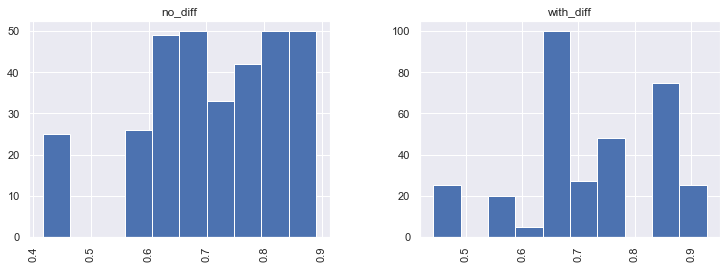

In [48]:
df.hist("scores", by="title", figsize=(12, 4));

In [49]:
μ_m = df.scores.mean()
μ_s = df.scores.std() * 2

with pm.Model() as model:
    group1_mean = pm.Normal("group1_mean", mu=μ_m, sd=μ_s)
    group2_mean = pm.Normal("group2_mean", mu=μ_m, sd=μ_s)

In [50]:
σ_low = 1
σ_high = 10

with model:
    group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)

C:\Python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The function `kdeplot` from PyMC3 is just an alias for `plot_kde` from ArviZ. Please switch to `pymc3.plot_kde` or `arviz.plot_kde`.
  after removing the cwd from sys.path.


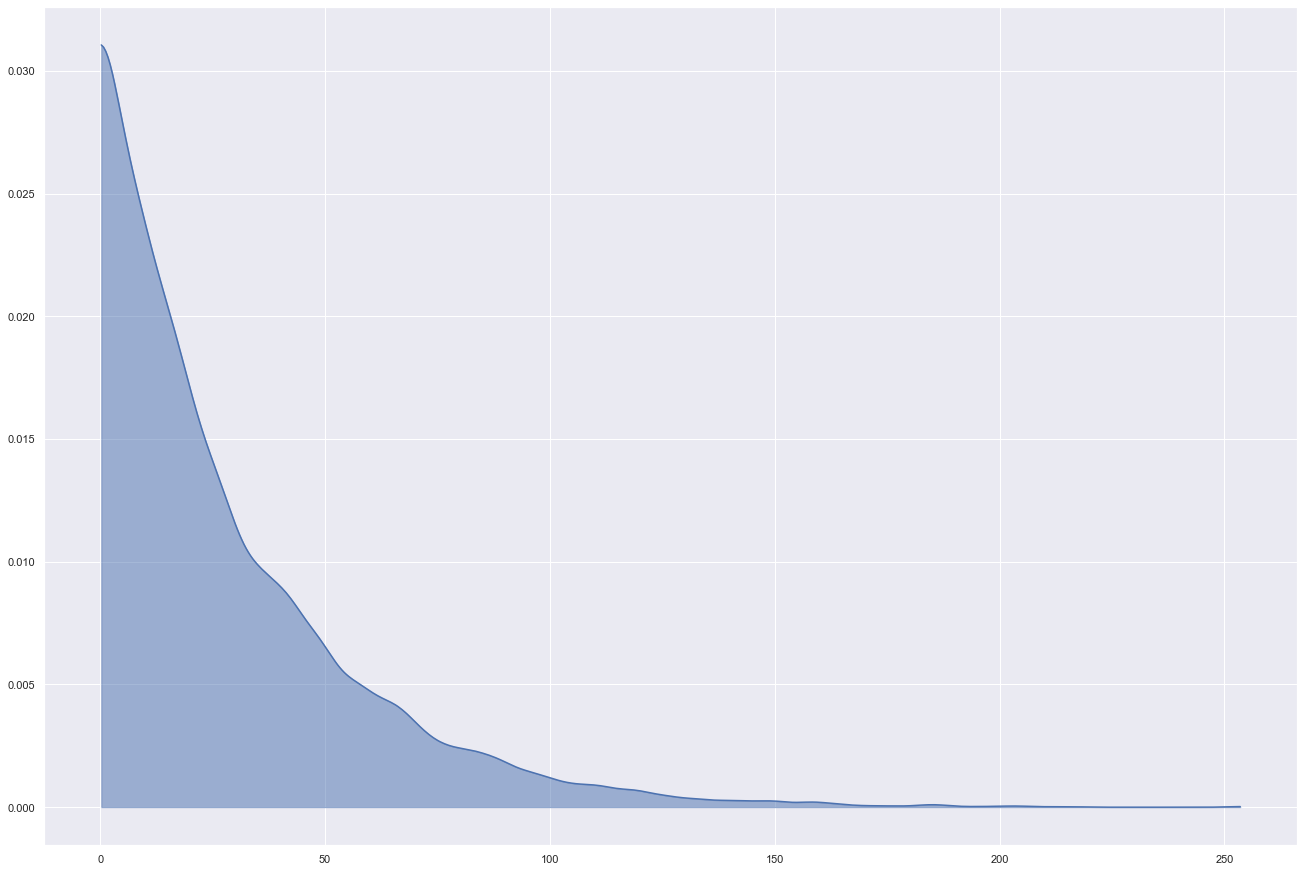

In [51]:
with model:
    ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1

pm.kdeplot(np.random.exponential(30, size=10000), fill_kwargs={"alpha": 0.5});



In [52]:
y1 = np.array(df[df.title == "no_diff"].scores)
y2 = np.array(df[df.title == "with_diff"].scores)
with model:
    lam1 = group1_std ** -2
    lam2 = group2_std ** -2

    group1 = pm.StudentT("no_diff", nu=ν, mu=group1_mean, lam=lam1, observed=y1)
    group2 = pm.StudentT("with_diff", nu=ν, mu=group2_mean, lam=lam2, observed=y2)



In [53]:
with model:
    diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
    effect_size = pm.Deterministic(
        "effect size", diff_of_means / np.sqrt((group1_std ** 2 + group2_std ** 2) / 2)
    )
    

In [54]:
with model:
    trace = pm.sample(2000)

C:\Python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 23 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


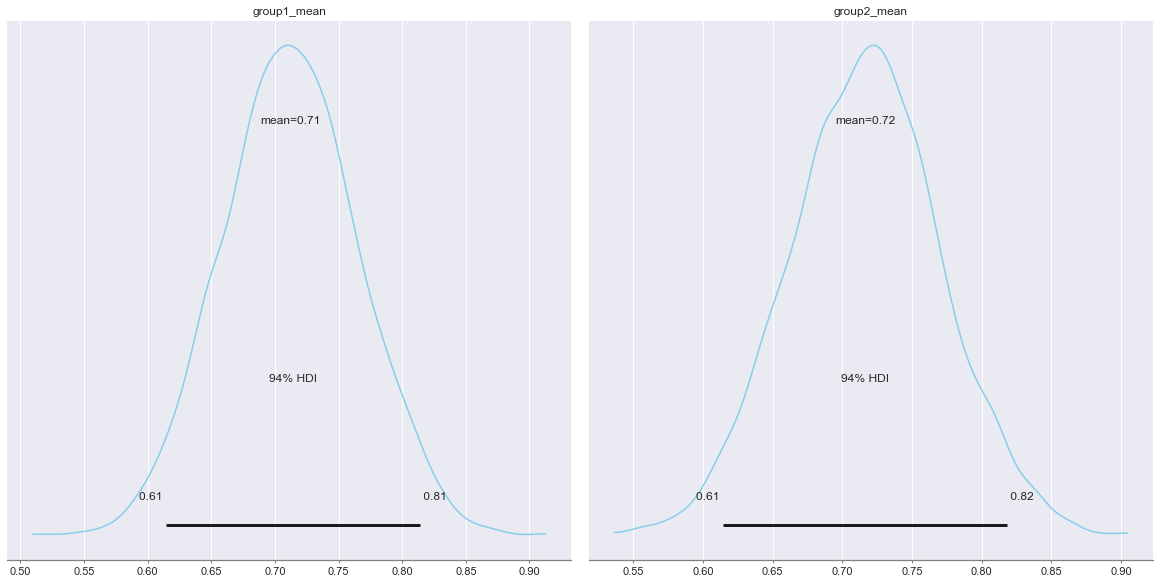

In [61]:
pm.plot_posterior(
    trace,
    var_names=["group1_mean", "group2_mean"],
    color="#87ceeb",
    figsize=(16,8)
);



C:\Python\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


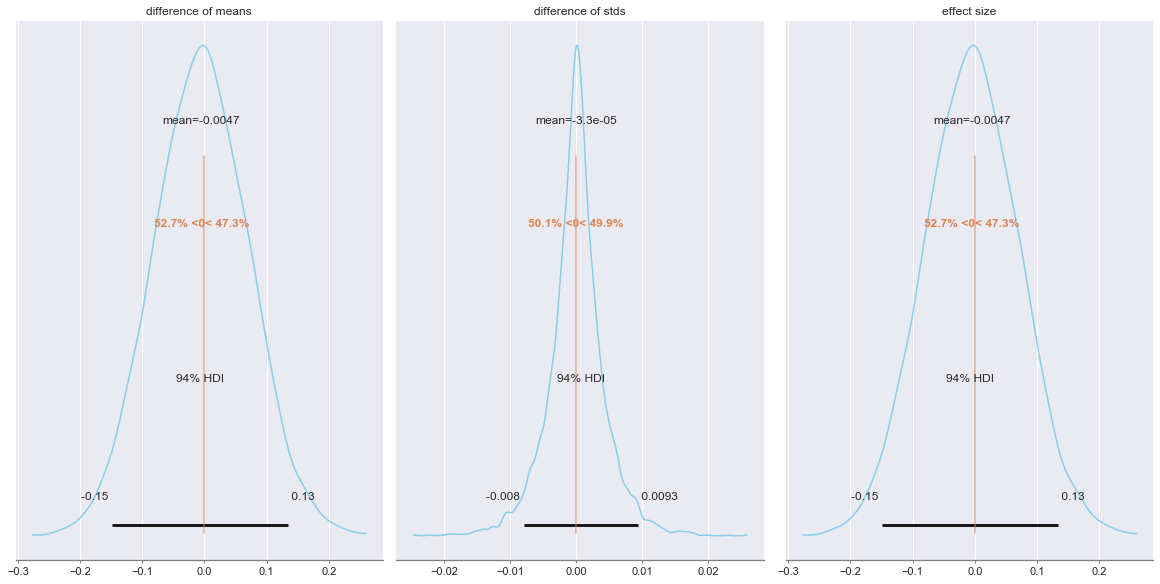

In [60]:
pm.plot_posterior(
    trace,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    color="#87ceeb",
    figsize=(16,8),
);



C:\Python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
C:\Python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


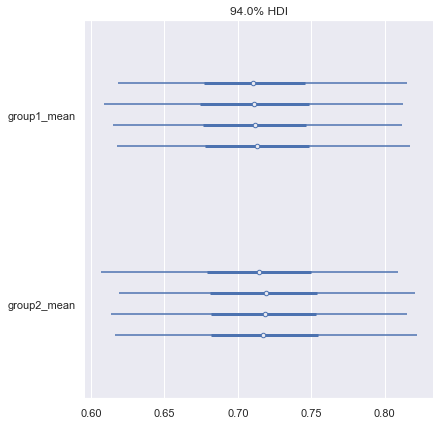

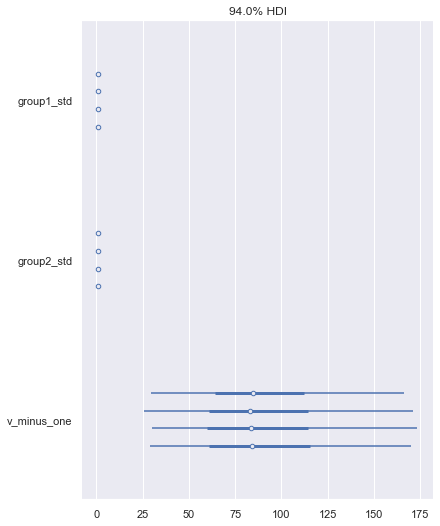

In [57]:
pm.forestplot(trace, var_names=["group1_mean", "group2_mean"]);

pm.forestplot(trace, var_names=["group1_std", "group2_std", "ν_minus_one"]);



In [59]:
pm.summary(trace, ["difference of means", "difference of stds", "effect size"])

C:\Python\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
difference of means -0.005  0.076  -0.150    0.134      0.001    0.001   
difference of stds  -0.000  0.004  -0.008    0.009      0.000    0.000   
effect size         -0.005  0.076  -0.149    0.134      0.001    0.001   

                     ess_bulk  ess_tail  r_hat  
difference of means    6469.0    5953.0    1.0  
difference of stds     6689.0    6095.0    1.0  
effect size            6473.0    5953.0    1.0